# **1. Perkenalan Dataset**


Dataset ini bernama Students Performance in Exams yang berisi informasi performa akademik siswa berdasarkan nilai tiga mata pelajaran, yaitu matematika, membaca, dan menulis. Dataset ini dirancang untuk memprediksi apakah siswa lulus semua mata pelajaran berdasarkan atribut seperti jenis kelamin, latar belakang etnis, tingkat pendidikan orang tua, jenis makan siang, dan status mengikuti kursus persiapan ujian.

Link Dataset: [Students Performance in Exams Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [3]:
# Memuat Dataset
df_student = pd.read_csv('/content/StudentsPerformance.csv')
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Assesing & Cleaning Data**

In [4]:
# Cek shape dataset
print(f"Dataset memiliki {df_student.shape[0]} baris dan {df_student.shape[1]} kolom")

Dataset memiliki 1000 baris dan 8 kolom


In [5]:
# Cek informasi dataset
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Konversi kolom object ke category
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in cat_cols:
    df_student[col] = df_student[col].astype('category')

# Cek informasi dataset setelah konversi
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


Tipe data object telah dirubah menjadi tipe category

In [7]:
# Cek missing value
df_student.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Ini menunjukkan bahwa dataset sudah bersih dari nilai kosong, sehingga tidak diperlukan proses imputasi atau penghapusan baris/kolom akibat data yang tidak lengkap.

In [8]:
# Cek duplikasi data
print("Jumlah duplikasi data: ", df_student.duplicated().sum())

Jumlah duplikasi data:  0


Dataset tidak terindikasi data yang duplikat

In [9]:
# Mendeteksi outlier dengan IQR
def cek_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"{column} - Jumlah outlier: {len(outliers)}")
    if len(outliers) > 0:
        print("→ Terdeteksi outlier.")
    else:
        print("→ Tidak ada outlier.")

# Cek semua skor
for kolom in ['math score', 'reading score', 'writing score']:
    cek_outlier_iqr(df_student, kolom)
    print()

math score - Jumlah outlier: 8
→ Terdeteksi outlier.

reading score - Jumlah outlier: 6
→ Terdeteksi outlier.

writing score - Jumlah outlier: 5
→ Terdeteksi outlier.



Berdasarkan hasil analisis terhadap fitur numerik menggunakan metode IQR (Interquartile Range), ditemukan sejumlah outlier pada masing-masing skor akademik siswa:
- math score memiliki 8 outlier
- reading score memiliki 6 outlier
- writing score memiliki 5 outlie

In [10]:
# Menghapus Outlier berdasarkan IQR
def hapus_outlier_iqr(df_student, column):
    Q1 = df_student[column].quantile(0.25)
    Q3 = df_student[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_bersih = df_student[(df_student[column] >= lower_bound) & (df_student[column] <= upper_bound)]
    return df_bersih

# Hapus outlier dari semua skor
for col in ['math score', 'reading score', 'writing score']:
    df_student = hapus_outlier_iqr(df_student, col)

# cek apakah sudah terhapus blm
for kolom in ['math score', 'reading score', 'writing score']:
    cek_outlier_iqr(df_student, kolom)

math score - Jumlah outlier: 0
→ Tidak ada outlier.
reading score - Jumlah outlier: 0
→ Tidak ada outlier.
writing score - Jumlah outlier: 0
→ Tidak ada outlier.


Setelah dilakukan deteksi dan penghapusan outlier menggunakan metode IQR pada fitur numerik (math score, reading score, dan writing score), seluruh outlier berhasil dihilangkan, ditandai dengan jumlah outlier yang kini menjadi nol untuk ketiga fitur tersebut

# **4. Exploratory Data Analysis (EDA)**

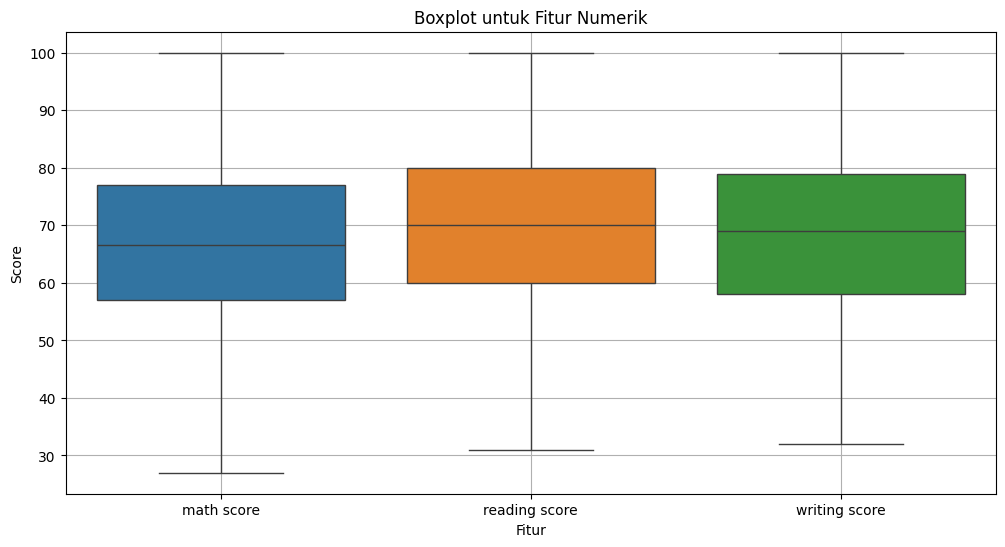

In [17]:
# Boxplot untuk semua fitur numerik
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_student[['math score', 'reading score', 'writing score']])
plt.title('Boxplot untuk Fitur Numerik')
plt.ylabel('Score')
plt.xlabel('Fitur')
plt.grid(True)
plt.show()

<ipython-input-12-1480880619>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_student, x='gender', palette='pastel')


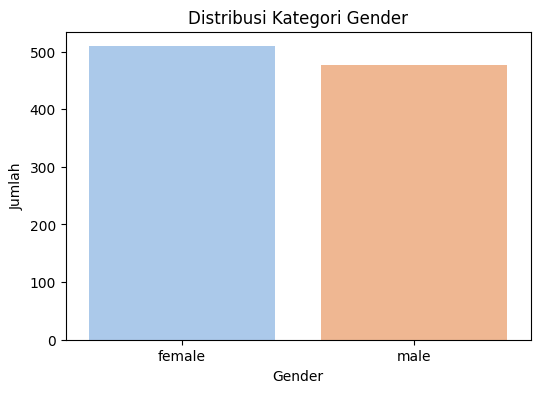

In [12]:
# Distribusi Kategori Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df_student, x='gender', palette='pastel')
plt.title('Distribusi Kategori Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

Distribusi gender dalam data relatif seimbang, dengan jumlah siswa perempuan (female) sedikit lebih banyak dibanding laki-laki (male).

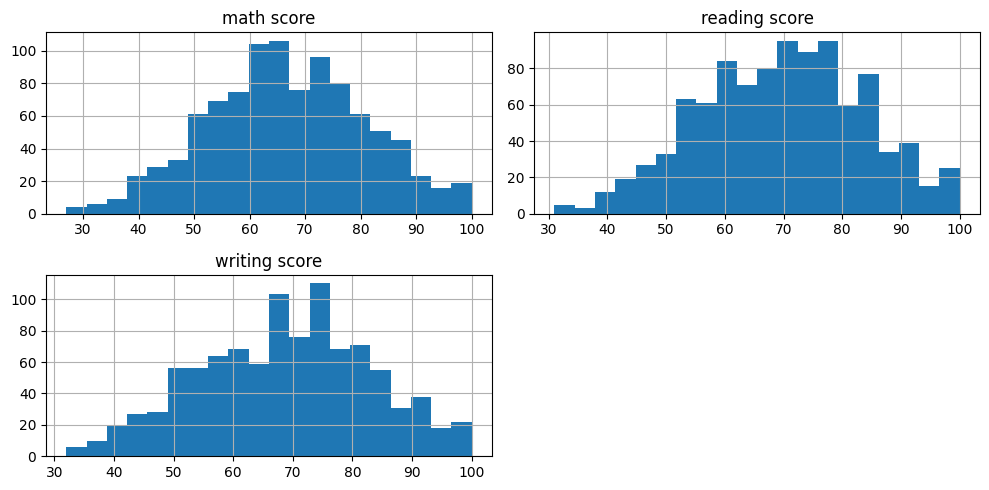

In [14]:
# Visualisasi skor ujian
df_student[['math score', 'reading score', 'writing score']].hist(figsize=(10,5), bins=20)
plt.tight_layout()
plt.show()

Dari histogram terlihat bahwa nilai rata-rata siswa dalam ujian matematika, membaca, dan menulis berada di rentang 60–80. Skor matematika memiliki sebaran yang lebih lebar dengan beberapa siswa memperoleh nilai rendah. Sebaliknya, skor membaca dan menulis lebih terkonsentrasi pada nilai menengah ke atas, menunjukkan performa yang lebih stabil di kedua bidang tersebut.

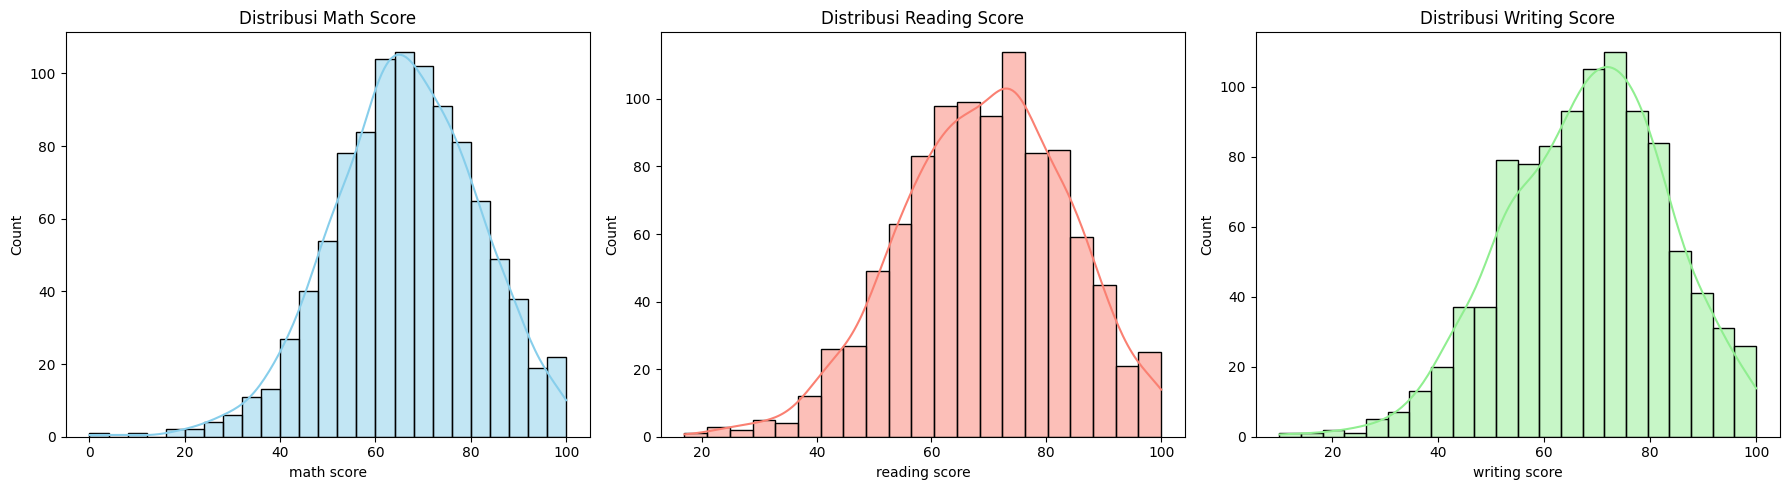

In [ ]:
#  Histogram (distribusi) untuk masing-masing skor
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_student['math score'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribusi Math Score')

sns.histplot(df_student['reading score'], kde=True, ax=axs[1], color='salmon')
axs[1].set_title('Distribusi Reading Score')

sns.histplot(df_student['writing score'], kde=True, ax=axs[2], color='lightgreen')
axs[2].set_title('Distribusi Writing Score')

plt.tight_layout()
plt.show()

Ketiga skor ujian menunjukkan distribusi yang hampir normal, namun skor matematika tampak lebih bervariasi dengan lebih banyak siswa yang memiliki nilai rendah. Sebaliknya, skor membaca dan menulis lebih terkonsentrasi di nilai tinggi dan menengah, menunjukkan performa yang lebih stabil di kedua area tersebut. Hal ini bisa menunjukkan bahwa siswa lebih mudah menguasai keterampilan membaca dan menulis dibanding matematika.

<ipython-input-12-3148023259>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_student, x='gender', y='average_score', palette='pastel')


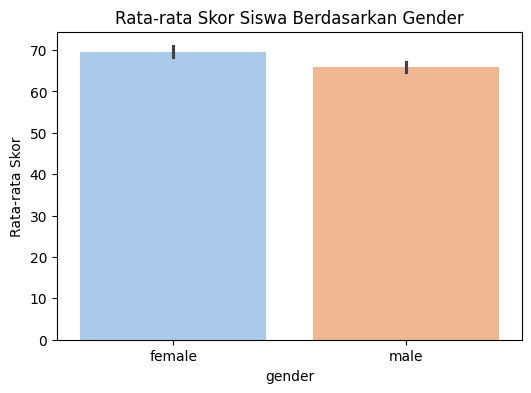

In [ ]:
# Rata-rata skor berdasarkan gender
df_student['average_score'] = df_student[['math score', 'reading score', 'writing score']].mean(axis=1)

plt.figure(figsize=(6,4))
sns.barplot(data=df_student, x='gender', y='average_score', palette='pastel')
plt.title('Rata-rata Skor Siswa Berdasarkan Gender')
plt.ylabel('Rata-rata Skor')
plt.show()

Siswa perempuan cenderung memiliki rata-rata skor ujian yang lebih tinggi dibandingkan siswa laki-laki.

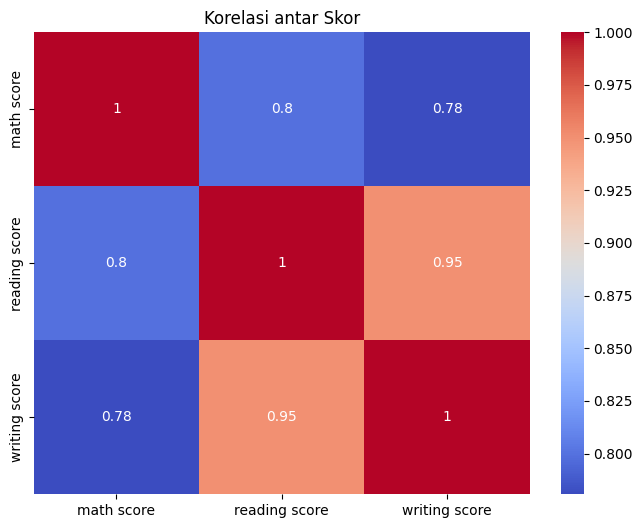

In [15]:
# Korelasi antar skor
plt.figure(figsize=(8,6))
sns.heatmap(df_student[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Skor")
plt.show()

Hasil visualisasi korelasi menunjukkan bahwa terdapat hubungan yang sangat kuat antara skor membaca dan menulis (r = 0.95), menandakan bahwa kemampuan literasi siswa berkembang secara paralel. Korelasi antara skor matematika dengan kedua skor literasi juga cukup kuat, namun lebih rendah, yang menunjukkan adanya keterkaitan namun tidak sebesar hubungan antar kemampuan literasi

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# Encode data kategorikal
from sklearn.preprocessing import LabelEncoder
cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = df_student.copy()
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [19]:
# Membuat label klasifikasi: lulus semua jika semua skor >= 60
threshold = 60
df_encoded['pass_all'] = ((df_student[['math score', 'reading score', 'writing score']] >= threshold).all(axis=1)).astype(int)

In [20]:
# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['math score', 'reading score', 'writing score']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("\nData setelah normalisasi:")
print(df_encoded.head())


Data setelah normalisasi:
   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  pass_all  
0                        1    0.370131       0.163761       0.371152         1  
1                        0    0.160831       1.458384       1.342041         1  
2                        1    1.625930       1.818002       1.688787         1  
3                        1   -1.374034      -0.915092      -1.709324         0  
4                        1    0.649197       0.595302       0.440501         1  


In [23]:
# Memisahkan fitur (X) dan target (y)
X = df_encoded.drop(columns='pass_all')  # Semua fitur kecuali target
y = df_encoded['pass_all']               # Target klasifikasi (0 = gagal, 1 = lulus)

# Menggabungkan kembali agar bisa displit bersama
df_model = pd.concat([X, y], axis=1)

In [27]:
# Membagi Dataset menjadi Data Latih dan Uji
train_df, test_df = train_test_split(df_encoded, test_size=0.3, random_state=42)

# Simpan ke file
train_df.to_csv("train_student.csv", index=False)
test_df.to_csv("test_student.csv", index=False)

print("\nJumlah data latih:", len(train_df))
print("Jumlah data uji:", len(test_df))


Jumlah data latih: 690
Jumlah data uji: 296
